# Export

In [1]:
import datetime
import os
from dataclasses import dataclass
from typing import Any, Dict, Tuple

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [11]:
path = "../logs/train/runs/2025-03-10_20-00-34/Common Buzzard/csv/version_0/Common_Buzzard.nc"
# path = "../logs/train/runs/2025-03-13_06-54-49/Common Buzzard/csv/version_0/20250313_Common_Buzzard.nc"
data = xr.open_dataset(path)
log_transformed = False

In [4]:
pred_count

<xarray.DataArray 'pred_log_hourly_count' (date: 6, time: 24)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.92857255e-09, 1.52645754e-07, 3.06458990e-11,
        9.47664121e-14, 3.51830912e-12, 2.58691628e-08, 2.63788820e-06,
        1.89231697e-09, 7.54617682e-18, 8.87989121e-29, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.21796497e-34, 2.55770879e-32,
        4.36085960e-33, 1.25932581e-34, 1.15600550e-35, 6.80263000e-35,
        3.38439799e-31, 3.21603879e-24, 1.04240438e-15, 1.71084225e-09,
        6.63367539e-09, 1.33547035e-14, 1.04784306e-21, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.03548584e+02, 3.03548584e+02, 3.03545654e+02,
        3.03291046e+02, 2.51594513e+02, 2.01388583e-01, 3.71942988e-05,
        1.16903887e-09, 2.01663976e-15, 3.86627553e-24, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
      dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 22:00:00 23:00:00
  * date     (date) datetime64[ns] 2025-03-13 2025-03-14 ... 2025-03-18

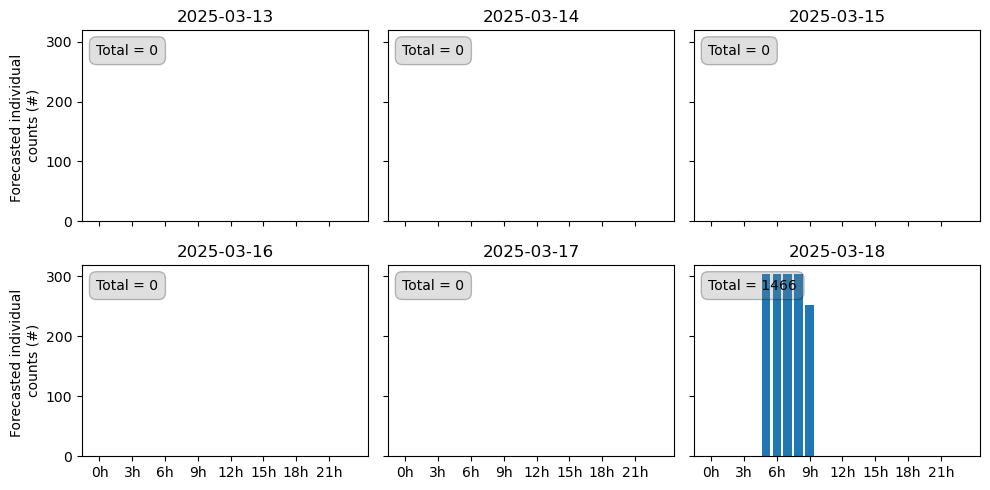

In [6]:
pred_count = np.expm1(data.pred_log_hourly_count)

fig, ax = plt.subplots(
    2, 3, figsize=(10, 5), tight_layout=True, sharex=True, sharey=True
)
ax = ax.flatten()
for k in range(len(pred_count)):
    subset = pred_count.isel(date=k)

    ax[k].bar(np.arange(24), subset.values)

    ax[k].set_title(subset.date.dt.strftime("%Y-%m-%d").item())
    ax[k].set_xticks(np.arange(0, 24, 3), [str(h) + "h" for h in np.arange(0, 24, 3)])

    ax[k].text(
        0.05,
        0.93,
        f"Total = {np.sum(subset.values):.0f}",
        transform=ax[k].transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="left",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="gray", alpha=0.25),
    )

ax[0].set_ylabel("Forecasted individual \ncounts (#)")
ax[3].set_ylabel("Forecasted individual \ncounts (#)")

plt.show()

[60.02143,
 51.584652,
 41.35328,
 99.49964,
 96.49705,
 22.660267,
 72.37734,
 13.34296,
 8.862451,
 61.890408,
 35.556713,
 96.49705,
 99.49964,
 35.452496,
 124.73332,
 39.8575]

340.0

In [ ]:
daily_average = data.mean(dim="time")["obs_count"]
valid_indices = np.where(daily_average > 0)[0]
weights = data.pred_log_hourly_count[valid_indices].sum(dim="time").values
sampled_indices = np.random.choice(valid_indices, size=16, p=weights / weights.sum())

all_obs = []
all_pred = []
all_mask = []

for d in daily_average[sampled_indices].date:
    subs = data.sel(date=d)
    if log_transformed:
        obs = np.log1p(subs["obs_count"])
        pred = subs["pred_log_hourly_count"]
    else:
        obs = subs["obs_count"]
        pred = np.expm1(subs["pred_log_hourly_count"])

    # If there is a single observation on that day, the structure of pred is different (no date dimension) and the plot need to be done differently.
    if "date" in pred.dims:
        pred_first = pred.isel(date=0)  # If date is a dimension
        mask = subs.mask.values
        # mask = subs.mask.sum(dim="date").values  # summing over all observations.
        obs = obs.values
    else:
        pred_first = pred
        obs = [obs.values]
        mask = [subs.mask.values]

    all_obs.append(obs)
    all_pred.append(pred)
    all_mask.append(mask)

# Compute maximum y value across all subplots
ymax = (
    max(
        np.max([np.max(p.values) for p in all_pred]),
        np.max([np.max(o) for o in all_obs]),
    )
    + 0.1
)

fig, ax = plt.subplots(4, 4, figsize=(12, 8), tight_layout=True)
ax = ax.flatten()

for i, d in enumerate(daily_average[sampled_indices].date):

    # plot the prediction (only the first prediction is show - all should be the same for the day)
    ax[i].plot(np.arange(0, 24), all_pred[i])

    # find the max y value for drawing the rectangle
    # ymax = max(pred.max(), max(obs)) + 0.1

    # Plot the mask as yellow transparant background
    for k, m in enumerate(np.sum(all_mask[i], axis=0)):
        ax[i].add_patch(
            Rectangle((k, 0), 1, ymax, color=(1, 1, 0, min(1, m)))
        )  # RGBA: (1, 1, 0) is yellow, 'm' controls the alpha

    for u, o in enumerate(all_obs[i]):
        first_nonzero = np.argmax(all_mask[i][u] > 0)
        last_nonzero = len(all_mask[i][u]) - 1 - np.argmax(np.flip(all_mask[i][u]) > 0)

        ax[i].plot([first_nonzero, last_nonzero + 1], [o, o], c="tab:red")

# ax[i].set_ylim(0, ymax)
ax[i].set_xlabel("hours")
ax[i].set_ylabel(f"Bird counts {'(transform)' if log_transformed else ''}")
ax[i].set_title(d.date.dt.strftime("%Y-%m-%d").item())

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

In [87]:
data

<xarray.Dataset>
Dimensions:                            (date: 1514, time: 24, location: 1)
Coordinates:
  * date                               (date) datetime64[ns] 1978-07-28 ... 2...
  * time                               (time) object '0 nanoseconds' ... '828...
  * location                           (location) object 'Defile'
Data variables: (12/20)
    temperature_2m                     (date, time, location) float64 ...
    dewpoint_temperature_2m            (date, time, location) float64 ...
    total_precipitation                (date, time, location) float64 ...
    surface_pressure                   (date, time, location) float64 ...
    u_component_of_wind_10m            (date, time, location) float64 ...
    v_component_of_wind_10m            (date, time, location) float64 ...
    ...                                 ...
    sun_altitude                       (date, time, location) float64 ...
    sun_azimuth                        (date, time, location) float64 ...
    pred_log_hourly_count              (date, time) float32 ...
    mask                               (date, time) float32 ...
    obs_count                          (date) float32 ...
    pred_count                         (date) float32 ...

In [103]:
data_df

,obs_count,pred_count
date,,
1978-07-28,0.0,0.001952
1978-07-29,0.0,0.001841
1978-07-30,0.0,0.003586
1978-08-03,0.0,0.024595
1978-08-06,0.0,0.006063
...,...,...
2014-11-21,0.0,7.803698
2014-11-22,0.0,0.094893
2014-11-24,0.0,6.499412


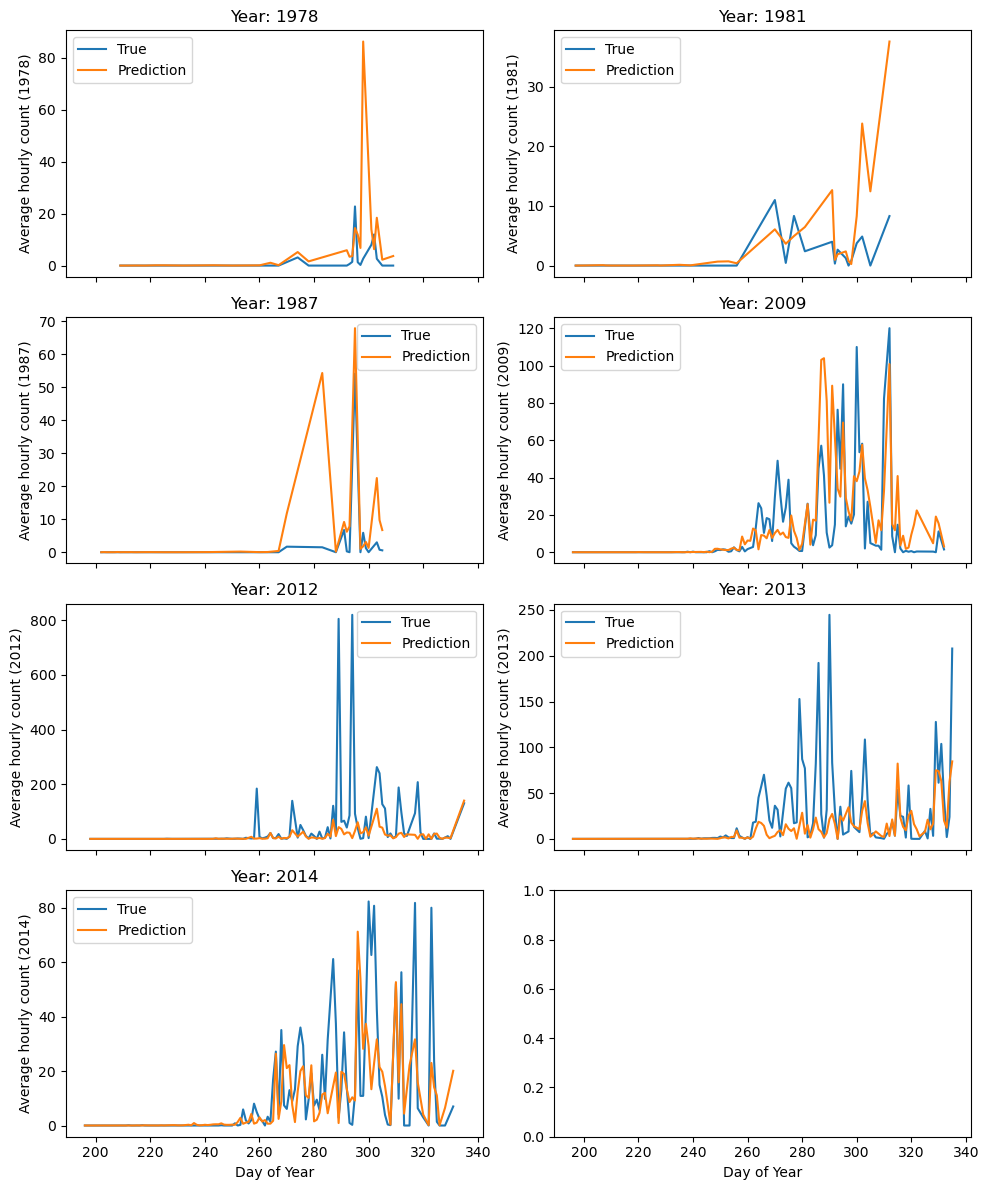

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
pred_count = np.expm1(data.pred_log_hourly_count)

In [124]:
subset.values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00425179, 0.00157129, 0.00146304, 0.00253652, 0.00514945,
       0.00865938, 0.01140802, 0.0131373 , 0.01454738, 0.0151508 ,
       0.0135566 , 0.01039294, 0.00799637, 0.00833095, 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

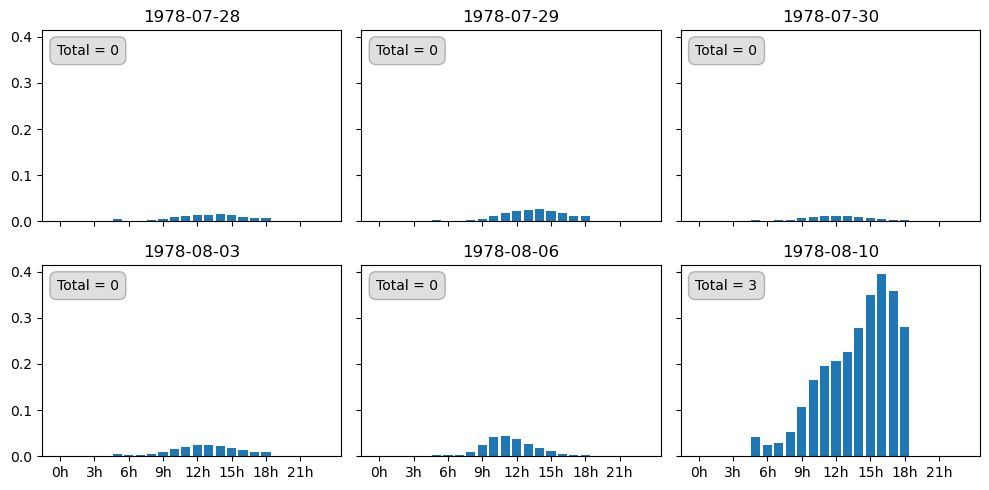

In [ ]:
fig, ax = plt.subplots(
    2, 3, figsize=(10, 5), tight_layout=True, sharex=True, sharey=True
)
ax = ax.flatten()
for k in range(6):  # len(pred_count.date)):
    subset = pred_count.isel(date=k)

    ax[k].bar(np.arange(24), subset.values)

    ax[k].set_title(subset.date.dt.strftime("%Y-%m-%d").item())
    ax[k].set_xticks(np.arange(0, 24, 3), [str(h) + "h" for h in np.arange(0, 24, 3)])

    ax[k].text(
        0.05,
        0.93,
        f"Total = {np.sum(subset.values):.0f}",
        transform=ax[k].transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="left",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="gray", alpha=0.25),
    )

In [ ]:
data.sum(dim="time").estimated_hourly_counts.plot()
plt.show()

In [ ]:
path = r"C:\Users\amedee.roy\OneDrive - FRANCE ENERGIES MARINES\SCRIPTS\defile-migration-forecast\logs\train\runs\2024-07-16_11-03-35\test_pred.nc"
data = xr.open_dataset(path)
data = data.assign_coords(year=data["date"].dt.year)

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

fig, ax = plt.subplots(2, 3, figsize=(15, 6), tight_layout=True)
ax = ax.flatten()
for k, year in enumerate(np.unique(data.year)):

    sub = data.where(data.year == year, drop=True)
    sub = sub.groupby("date").mean()

    sub.masked_total_counts.plot(ax=ax[k], label="True")
    sub.estimated_masked_total_counts.plot(ax=ax[k], label="Prediction")

    score = r2_score(sub.masked_total_counts, sub.estimated_masked_total_counts)
    coeff = pearsonr(sub.masked_total_counts, sub.estimated_masked_total_counts)

    ax[k].annotate(
        rf"R$^2$ = {score:.2f}" + "\n" + rf"$\rho$ = {coeff.statistic:.2f}",
        xy=(0.05, 0.7),
        xycoords="axes fraction",
        bbox=dict(facecolor="grey", alpha=0.3),
    )

    ax[k].set_title(year)

plt.legend()
plt.show()

In [ ]:
subs

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(12, 8), tight_layout=True)
ax = ax.flatten()
for i, k in enumerate(np.random.randint(0, len(data.date), size=16)):
    subs = data.isel(date=k)
    ax[i].plot(np.arange(0, 24), subs.estimated_hourly_counts)
    ax[i].plot(np.arange(0, 24), subs.temperature_2m / 10)

In [ ]:
# path = r"C:\Users\amedee.roy\OneDrive - FRANCE ENERGIES MARINES\SCRIPTS\defile-migration-forecast\data\all_count_processed.csv"
# data = pd.read_csv(path, parse_dates=["date", "start", "end"])
# data['year'] = data['date'].dt.year
# data['obs_time'] = (data['end'] - data['start']).dt.seconds/3600
# data_demo = data.groupby(["year", "species"]).sum(numeric_only=True)
# data_demo['rel_count'] = data_demo['count'] / data_demo['obs_time']
# data_demo = data_demo.reset_index()

In [ ]:
# species = ["Milan noir", "Common Buzzard", "Bondrée apivore",
#             "Milan royal", "Épervier d'Europe", "Faucon crécerelle",
#             "Balbuzard pêcheur", "Faucon hobereau", "Busard Saint-Martin",
#             "Faucon émerillon", "Busard cendré", "Circaète Jean-le-Blanc"]

# fig, ax = plt.subplots(4,3, figsize=(12,8), tight_layout=True)
# ax = ax.flatten()
# for k, sp in enumerate(species):
#     sub = data_demo[data_demo.species == sp].copy()

#     x = np.linspace(min(sub.year), max(sub.year), 100)
#     coef = np.polyfit(sub.year, sub.rel_count, 5)
#     y = np.polyval(coef, x)

#     ax[k].plot(sub.year, sub.rel_count)
#     ax[k].plot(x, y)
#     ax[k].set_title(sp)

## Global metric


In [ ]:
true_count = data.masked_total_counts.values
pred_count = data.estimated_masked_total_counts.values

plt.hist(true_count, label="True count", alpha=0.5)
plt.hist(pred_count, label="Predicted count", alpha=0.5)
plt.xlabel("Count (log-scale)")
plt.ylabel("Histogram")
plt.legend()
plt.show()

In [ ]:
x = np.linspace(min(true_count), max(true_count), 100)
coef = np.polyfit(true_count, pred_count, 5)
y = np.polyval(coef, x)

plt.scatter(true_count, pred_count, c="black", s=5, alpha=0.4)
plt.plot(x, y, c="red")
plt.plot(x, x, "--", c="black")
plt.xlabel("True count (log-scale)")
plt.ylabel("Predicted count (log-scale)")
plt.show()

## Timeseries


In [ ]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(4, 4, figsize=(12, 8), tight_layout=True)
ax = ax.flatten()
for i, k in enumerate(np.random.randint(0, len(data.date), size=16)):
    subs = data.isel(date=k)

    ax[i].plot(np.arange(0, 24), subs.estimated_hourly_counts)
    for k, m in enumerate(subs.mask.values):
        if m == 1:
            ax[i].add_patch(Rectangle((k, 0), m, 10, color="yellow"))
            obs = subs.masked_total_counts.item() / subs.mask.sum().item()
            ax[i].plot([k, k + 1], [obs, obs], c="tab:red")

    ax[i].set_ylim(0, max(subs.estimated_hourly_counts.max(), obs) + 0.1)
    ax[i].set_xlabel("hours")
    ax[i].set_ylabel("Bird counts (log10)")
# plt.savefig(f'{self.plotdir}/plt_timeseries.jpg')

In [ ]:
data = data.assign_coords(doy=data.date.dt.dayofyear)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
data.groupby("doy").sum().masked_total_counts.plot(ax=ax, label="True")
data.groupby("doy").sum().estimated_masked_total_counts.plot(ax=ax, label="Prediction")
plt.legend()
plt.show()